Importando as bibliotecas

In [1]:
import pandas as panda
import matplotlib.pyplot as mat



A função abaixo gera um gráfico de barras com os cinco aplicativos mais populares, exibindo o número de instalações ao lado de cada barra para facilitar a leitura dos dados.

In [2]:
def exibir_top_5_apps():

    arquivo = panda.read_csv('googleplaystore.csv')

    arquivo = arquivo.drop_duplicates()
    
    

    valores_errados = ~arquivo['Installs'].str.replace('[+,]', '', regex=True).str.isnumeric()
    if valores_errados.any():
        arquivo.loc[valores_errados, 'Installs'] = arquivo.loc[valores_errados, 'Size']

    
    arquivo['Installs'] = arquivo['Installs'].replace('[+,]', '', regex=True).astype(int)

    top_5_apps = arquivo.sort_values(by='Installs', ascending=False).head(5)

    mat.figure(figsize=(15, 6))
    bars = mat.barh(top_5_apps['App'], top_5_apps['Installs'], color='skyblue')

    mat.xlim(0, top_5_apps['Installs'].max() * 1.1)

    for bar in bars:
        mat.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
                 f'{bar.get_width():,.0f}',  
                 va='center') 

    mat.xlabel('Número de Instalações')
    mat.ylabel('Aplicativo')
    mat.title('Top 5 Aplicativos por Número de Instalações')
    mat.gca().invert_yaxis()
    mat.show()

Essa função abaixo gera um grafico de pizza que permite visualizar a proporção de cada categoria de aplicativo presente no dataset, mostrando rapidamente quais categorias são mais comuns.

In [3]:
def categorias_app():

    arquivo = panda.read_csv('googleplaystore.csv')

    arquivo = arquivo.drop_duplicates()    

    frequencia_categorias = arquivo['Category'].value_counts()

    frequencia_categorias_filtradas = frequencia_categorias[frequencia_categorias > 1]

    
    explode = [0.2] * len(frequencia_categorias_filtradas)  

    mat.figure(figsize=(50, 25))  

    mat.pie(frequencia_categorias_filtradas, labels=frequencia_categorias_filtradas.index, 
        autopct='%1.0f%%', startangle=140, wedgeprops={'edgecolor': 'white'}, 
        explode=explode, pctdistance=0.85,
        textprops={'fontsize': 5})  

    mat.legend(frequencia_categorias_filtradas.index, title="Categorias", 
               bbox_to_anchor=(1.35, 1.20), loc='upper left')

    mat.title('Distribuição de Categorias de Apps no Dataset', fontsize=16, pad=25)

    mat.show()

A função abaixo identifica e exibe o aplicativo mais caro presente no dataset

In [4]:
def app_mais_caro():

    arquivo = panda.read_csv('googleplaystore.csv')

    arquivo = arquivo.drop_duplicates()


    arquivo['Price'] = panda.to_numeric(
    arquivo['Price'].str.replace('[+,$.]', '', regex=True), errors='coerce'
).fillna(0).astype(int)

    app_mais_caro = arquivo.loc[arquivo['Price'].idxmax()]

    print("App mais caro:")
    print(app_mais_caro)

A função abaixo conta quantos aplicativos são classificados como "Mature 17+" no dataset

In [5]:
def possuir_mature17():

    arquivo = panda.read_csv('googleplaystore.csv')

    arquivo = arquivo.drop_duplicates()

    mature_17_count = arquivo[arquivo["Content Rating"] == "Mature 17+"].shape[0]


    print(f"Quantidade de aplicativos classificados como 'Mature 17+': {mature_17_count}")

A função a seguir identifica e exibe os dez aplicativos com o maior número de avaliações no dataset

In [6]:
def top_10_apps_numeros_reviews():

    arquivo = panda.read_csv('googleplaystore.csv')

    arquivo = arquivo.drop_duplicates()

    arquivo["Reviews"] = panda.to_numeric(arquivo["Reviews"], errors="coerce")

    arquivo = arquivo.dropna(subset=["Reviews"])

    top_reviews = arquivo.loc[arquivo.groupby("App")["Reviews"].idxmax()]

    top_10_reviews = top_reviews.nlargest(10, "Reviews")[["App", "Reviews"]]

    print("Top 10 aplicativos por número de reviews:")
    print(top_10_reviews)

A função dois_calculos() realiza duas operações principais para fornecer uma visão sobre os aplicativos do dataset, essa função é útil para entender quais aplicativos lideram em cada categoria, além de calcular uma média geral das avaliações.

In [7]:
def dois_calculos():

    arquivo = panda.read_csv('googleplaystore.csv')

    arquivo = arquivo.drop_duplicates()

    arquivo["Reviews"] = panda.to_numeric(arquivo["Reviews"], errors="coerce")

    arquivo = arquivo.dropna(subset=["Reviews"])

    top_10_por_categoria = arquivo.loc[
        arquivo.groupby("Category")["Reviews"].idxmax().sort_values().unique()
    ].nlargest(10, "Reviews")[["Category", "App", "Reviews"]]

    print("\nTop 10 aplicativos por categoria:")
    print(top_10_por_categoria)

    media_reviews = arquivo["Reviews"].mean()
    print(f"\nA média de reviews dos aplicativos é: {media_reviews:.2f}")

A função abaixo cria dois gráficos(grafico de linha e de dispersão) a partir dos dados do dataset, para destacar a média de avaliações dos aplicativos e os aplicativos mais bem avaliados em cada categoria.

In [ ]:
def dois_graficos():
    arquivo = panda.read_csv('googleplaystore.csv')
    arquivo = arquivo.drop_duplicates()
    arquivo["Reviews"] = panda.to_numeric(arquivo["Reviews"], errors="coerce")
    arquivo = arquivo.dropna(subset=["Reviews"])
    top_10_por_categoria = arquivo.loc[
        arquivo.groupby("Category")["Reviews"].idxmax().sort_values().unique()
    ].nlargest(10, "Reviews")[["Category", "App", "Reviews"]]
    media_reviews = arquivo["Reviews"].mean()    
    mat.figure(figsize=(10, 6))
    mat.plot(['Média de Reviews'], [media_reviews], marker='o', color='blue')
    mat.grid(True, linestyle='--', alpha=0.7)
    mat.text(0, media_reviews + 0.2, f"{media_reviews:.2f}", ha='center', va='bottom', 
         fontsize=12, color='blue', fontweight='bold')
    mat.title("Média de Reviews")
    mat.ylabel("Quantidade de Reviews")
    mat.figure(figsize=(12, 8))
    mat.scatter(top_10_por_categoria["Category"], top_10_por_categoria["Reviews"], color='orange')
    mat.title("Top 10 Aplicativos por Categoria (por Reviews)")
    mat.xlabel("Categoria")
    mat.ylabel("Quantidade de Reviews")
    mat.xticks(rotation=45, ha='right', fontsize=10)
    for i, row in top_10_por_categoria.iterrows():
        mat.annotate(
        row["App"], (row["Category"], row["Reviews"]),
        textcoords="offset points", xytext=(0, 6),
        ha='center', fontsize=6, color="black"  
    )
    mat.grid(axis="y", linestyle="--", alpha=0.6)
    mat.xticks(rotation=45, ha='right')
    mat.tight_layout()
    mat.show()

Abaixo eu vou apenas chamar as funções para serem executadas

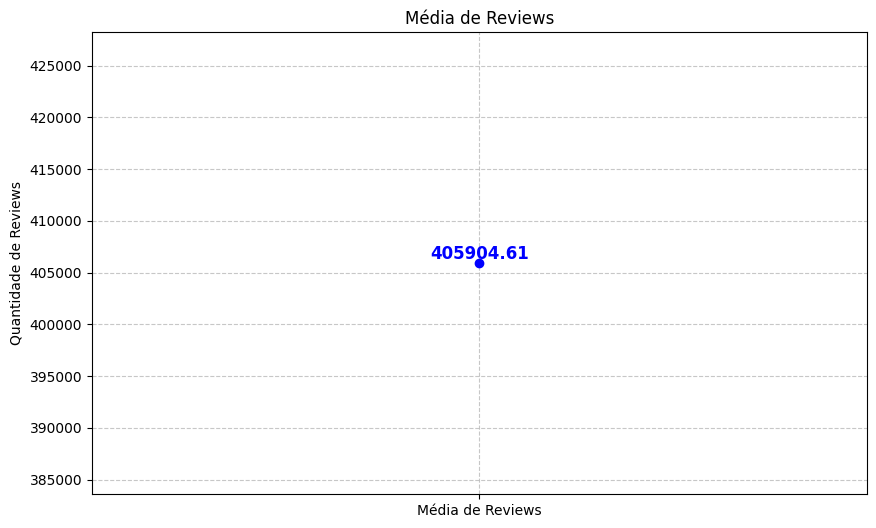

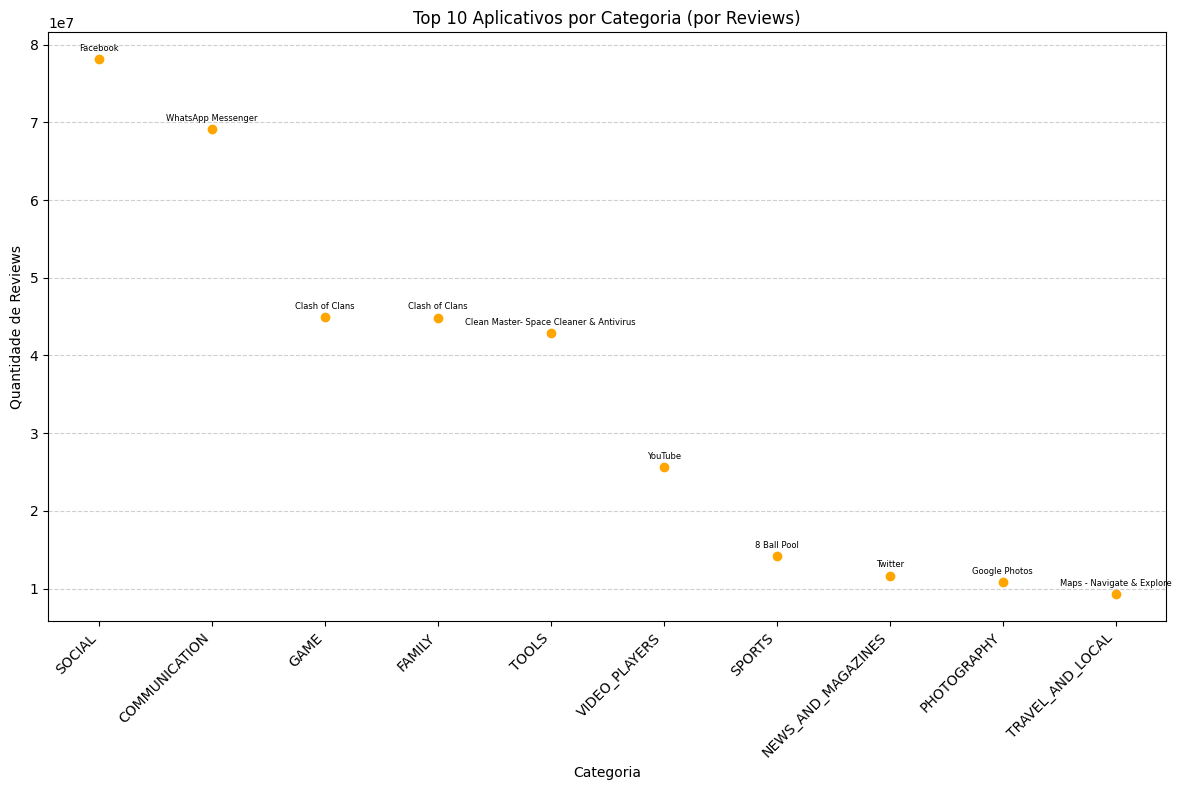


Top 10 aplicativos por categoria:
                Category                                      App     Reviews
2544              SOCIAL                                 Facebook  78158306.0
336        COMMUNICATION                       WhatsApp Messenger  69119316.0
1879                GAME                           Clash of Clans  44893888.0
3986              FAMILY                           Clash of Clans  44881447.0
4005               TOOLS  Clean Master- Space Cleaner & Antivirus  42916526.0
3665       VIDEO_PLAYERS                                  YouTube  25655305.0
3953              SPORTS                              8 Ball Pool  14184910.0
3739  NEWS_AND_MAGAZINES                                  Twitter  11667403.0
2884         PHOTOGRAPHY                            Google Photos  10859051.0
3223    TRAVEL_AND_LOCAL                Maps - Navigate & Explore   9235373.0

A média de reviews dos aplicativos é: 405904.61
Top 10 aplicativos por número de reviews:
                

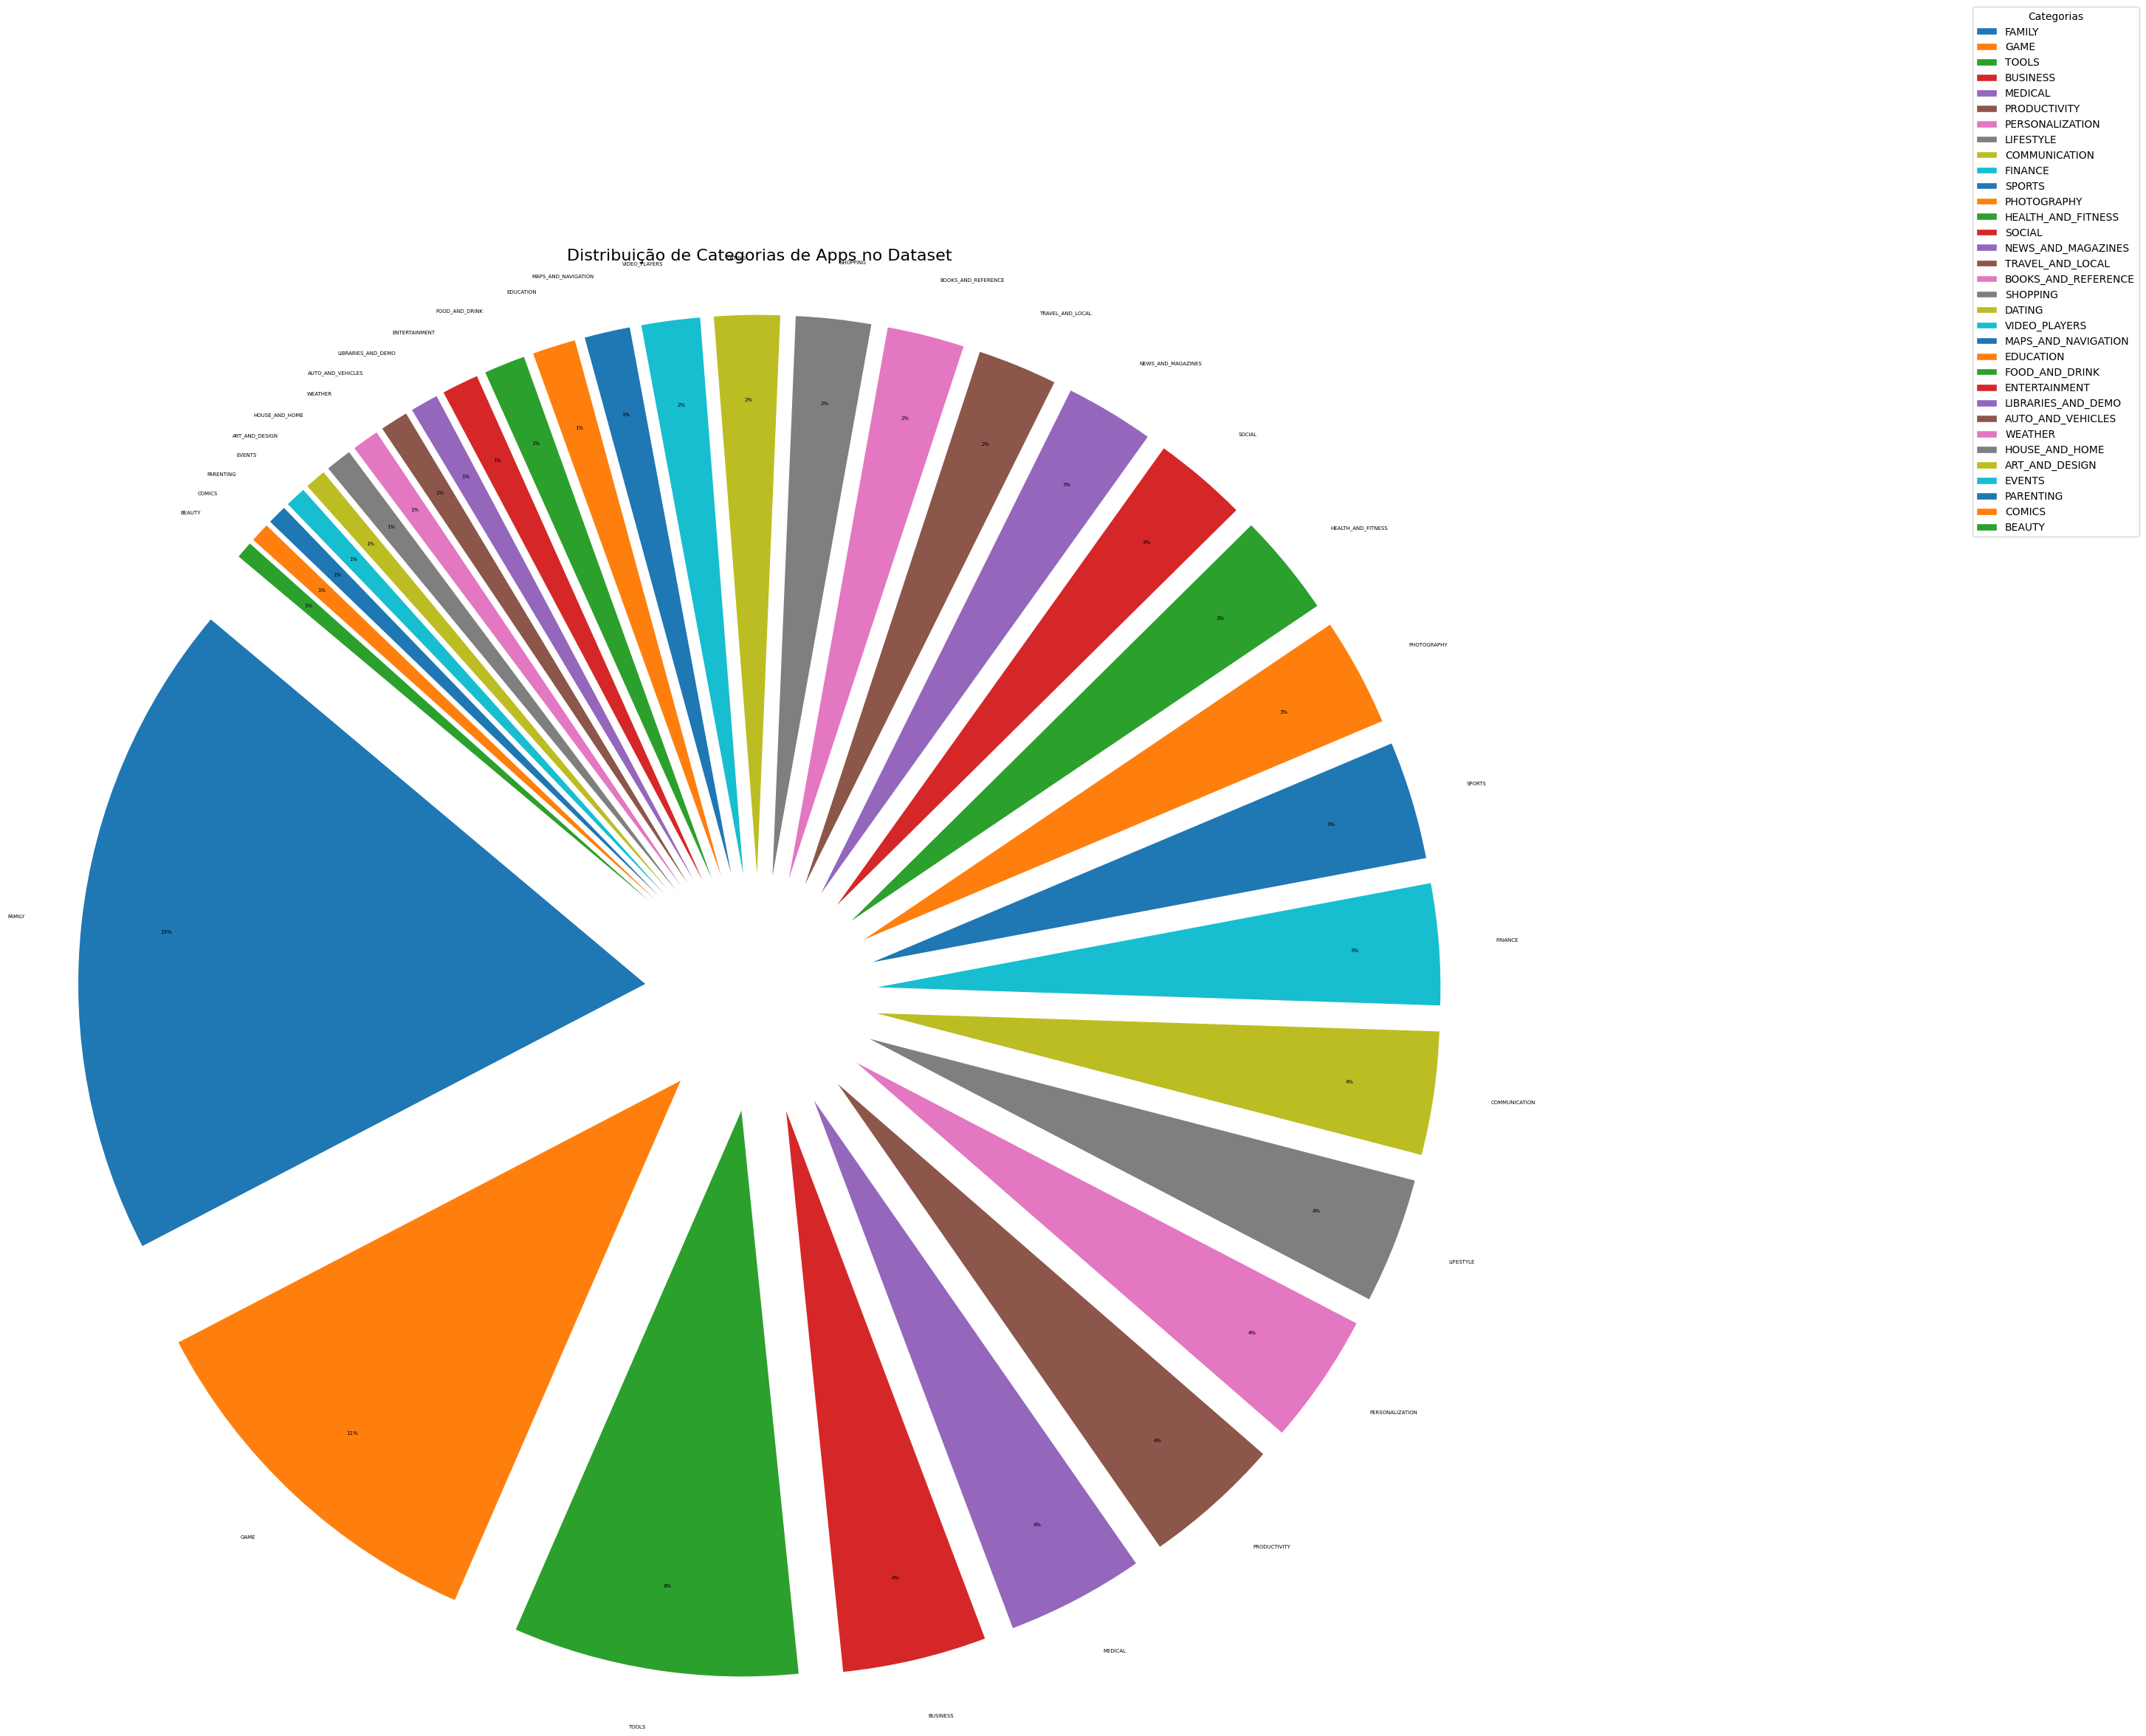

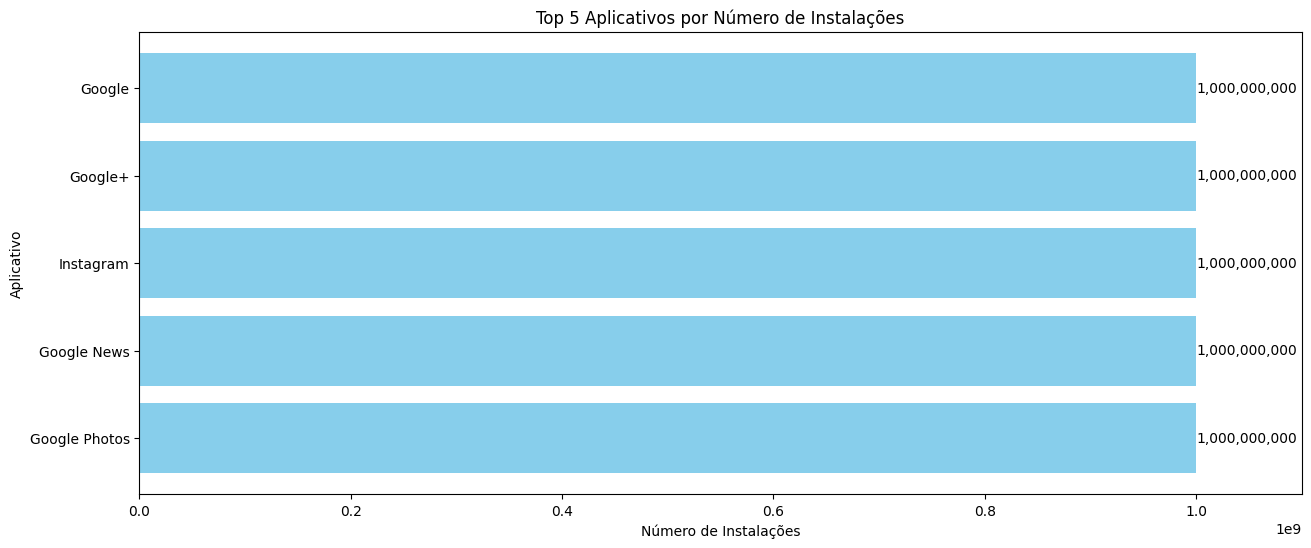

In [9]:
dois_graficos()
dois_calculos()
top_10_apps_numeros_reviews()
possuir_mature17()
app_mais_caro()
categorias_app()
exibir_top_5_apps()